In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('fraudTrain.csv')

In [4]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
not_fraud=df[df.is_fraud==0]
fraud=df[df.is_fraud==1]

In [9]:
df.groupby('is_fraud').mean()

C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_13032\1275281510.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,648473.169029,4.172901e+17,67.667110,48805.107481,38.536888,-90.228142,88775.228137,1.349249e+09,38.536659,-90.228274
1,624949.724354,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808


# Balancing the Dataset

In [10]:
legit_sample=not_fraud.sample(n=7506)

In [11]:
new_df=pd.concat([legit_sample, fraud], axis=0)

In [12]:
new_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
834344,834344,2019-12-12 01:49:11,3576144910346950,fraud_Bailey-Morar,grocery_pos,110.53,Thomas,Payne,M,9455 Kathleen Brook Apt. 651,...,65.6899,-156.2920,277,"Engineer, civil (consulting)",1965-11-06,11b089c0e5003d35c43e0c38d4c6c118,1355276951,66.333933,-156.614593,0
1155632,1155632,2020-04-27 05:48:18,348379466427142,"fraud_Moore, Dibbert and Koepp",misc_net,4.35,Michael,Rowe,M,7428 Martinez Flats,...,28.1384,-80.6524,139650,Database administrator,1957-01-23,3f3dcd7e1c77872cfb929527fd273d56,1367041698,27.375883,-81.002673,0
194548,194548,2019-04-10 12:53:29,4277232699798846,fraud_Botsford PLC,home,47.48,Jennifer,Vance,F,13299 Patrick Terrace,...,46.1664,-103.7079,475,Illustrator,1955-11-10,60dfde55b24f55ec81f991c00e2d1265,1334062409,46.470367,-104.349882,0
767296,767296,2019-11-24 17:07:42,6011492816282597,"fraud_Bradtke, Torp and Bahringer",personal_care,57.98,Gary,Barnes,M,2970 Flores Brooks,...,33.3398,-92.7442,2501,Financial adviser,1986-06-11,8867cdda0d21fc0279bec021c79ee622,1353776862,33.879450,-91.750141,0
1048273,1048273,2020-03-10 14:20:54,30230540139182,fraud_Altenwerth-Kilback,home,81.66,Hayden,Sanders,M,8465 Reed Green Suite 559,...,40.9661,-76.8575,645,Orthoptist,1974-05-18,0c1f85bd5616069309306de1e206f8a5,1362925254,40.008245,-77.615694,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295399,1295399,2020-06-21 01:00:08,3524574586339330,fraud_Kassulke PLC,shopping_net,977.01,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1
1295491,1295491,2020-06-21 01:53:35,3524574586339330,fraud_Schumm PLC,shopping_net,1210.91,Ashley,Cabrera,F,94225 Smith Springs Apt. 617,...,27.6330,-80.4031,105638,"Librarian, public",1986-05-07,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1
1295532,1295532,2020-06-21 02:16:56,4005676619255478,"fraud_Tillman, Dickinson and Labadie",gas_transport,10.24,William,Perry,M,458 Phillips Island Apt. 768,...,30.4590,-90.9027,71335,Herbalist,1994-05-31,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1
1295666,1295666,2020-06-21 03:26:20,3560725013359375,fraud_Corwin-Collins,gas_transport,21.69,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,31.8599,-102.7413,23,Cytogeneticist,1969-09-15,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1


In [13]:
new_df['is_fraud'].value_counts()

0    7506
1    7506
Name: is_fraud, dtype: int64

In [14]:
new_df.groupby('is_fraud').mean()

C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_13032\3265299613.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.groupby('is_fraud').mean()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,657139.423128,4.319897e+17,70.604295,49096.434452,38.577248,-90.458611,89986.342393,1.349544e+09,38.577090,-90.459033
1,624949.724354,4.003577e+17,531.320092,48038.714229,38.663609,-89.916041,97276.763256,1.348389e+09,38.653901,-89.915808


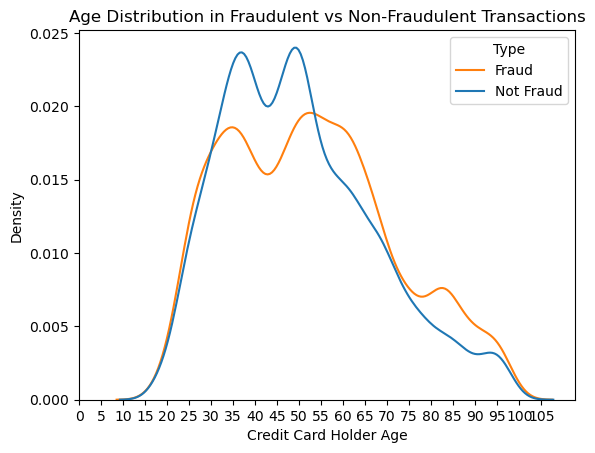

In [29]:
import datetime as dt
import seaborn as sns
new_df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year
ax=sns.kdeplot(x='age',data=new_df, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

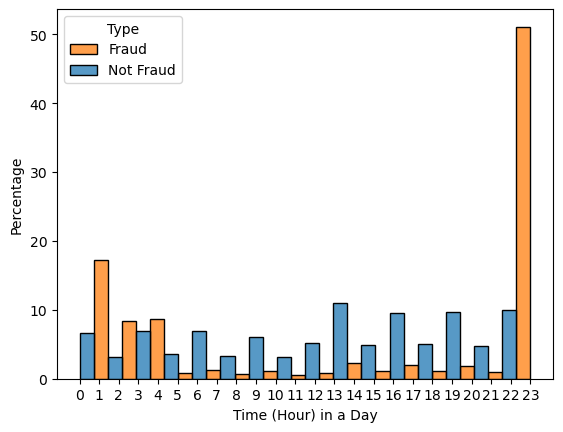

In [30]:
new_df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=new_df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_13032\997376236.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


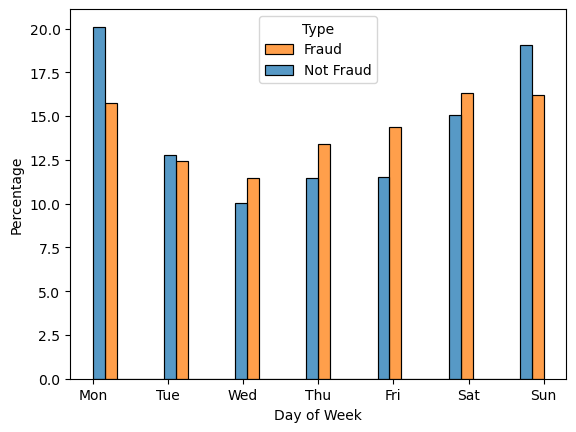

In [31]:
new_df['day']=pd.to_datetime(new_df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=new_df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

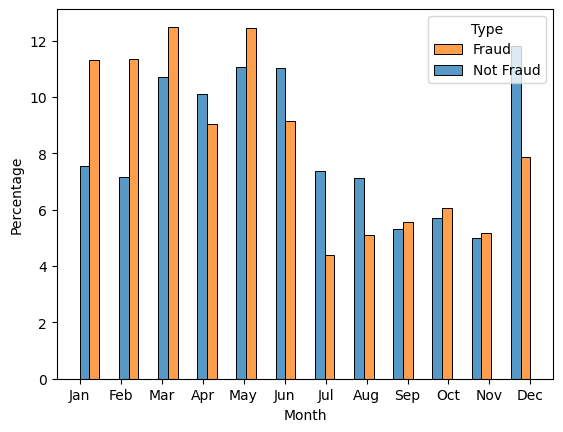

In [33]:
new_df['month']=pd.to_datetime(new_df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=new_df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In [34]:
train=new_df[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
train=pd.get_dummies(train, drop_first=True)
y_train=train['is_fraud'].values
X_train=train.drop("is_fraud", axis='columns').values

In [35]:
test=pd.read_csv('fraudTest.csv')
test['age']=dt.date.today().year-pd.to_datetime(test['dob']).dt.year
test['hour']=pd.to_datetime(test['trans_date_trans_time']).dt.hour
test['day']=pd.to_datetime(test['trans_date_trans_time']).dt.dayofweek
test['month']=pd.to_datetime(test['trans_date_trans_time']).dt.month
test=test[['category','amt','zip','lat','long','city_pop','merch_lat','merch_long','age','hour','day','month','is_fraud']]
test=pd.get_dummies(test, drop_first=True)
y_test=test['is_fraud'].values
X_test=test.drop("is_fraud", axis='columns').values

In [36]:
test

,amt,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,day,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,29209,33.9659,-80.9355,333497,33.986391,-81.200714,55,12,6,...,0,0,0,0,0,0,1,0,0,0
1,29.84,84002,40.3207,-110.4360,302,39.450498,-109.960431,33,12,6,...,0,0,0,0,0,0,1,0,0,0
2,41.28,11710,40.6729,-73.5365,34496,40.495810,-74.196111,53,12,6,...,0,1,0,0,0,0,0,0,0,0
3,60.05,32780,28.5697,-80.8191,54767,28.812398,-80.883061,36,12,6,...,0,0,0,0,0,1,0,0,0,0
4,3.19,49632,44.2529,-85.0170,1126,44.959148,-85.884734,68,12,6,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,63453,40.4931,-91.8912,519,39.946837,-91.333331,57,23,3,...,0,1,0,0,0,0,0,0,0,0
555715,111.84,77566,29.0393,-95.4401,28739,29.661049,-96.186633,24,23,3,...,0,0,0,1,0,0,0,0,0,0
555716,86.88,99323,46.1966,-118.9017,3684,46.658340,-119.715054,42,23,3,...,0,0,0,1,0,0,0,0,0,0
555717,7.99,83643,44.6255,-116.4493,129,44.470525,-117.080888,58,23,3,...,0,0,0,0,0,0,0,0,0,1


# Logistic Regression

In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

method= SMOTE()
X_resampled, y_resampled = method.fit_resample(X_train, y_train)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(X_test)
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98    553574
           1       0.06      0.75      0.11      2145

    accuracy                           0.95    555719
   macro avg       0.53      0.85      0.54    555719
weighted avg       1.00      0.95      0.97    555719

Confusion matrix:
 [[528022  25552]
 [   534   1611]]
Share of Non-Fraud in Test Data: 0.9961


# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=5)
model2.fit(X_resampled,y_resampled)
predicted=model2.predict(X_test)
print('Report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Number of Non-Fraud in Test Data:', 1-round(y_test.sum()/len(y_test),4))

Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.16      0.96      0.27      2145

    accuracy                           0.98    555719
   macro avg       0.58      0.97      0.63    555719
weighted avg       1.00      0.98      0.99    555719

Confusion matrix:
 [[542550  11024]
 [    93   2052]]
Number of Non-Fraud in Test Data: 0.9961
